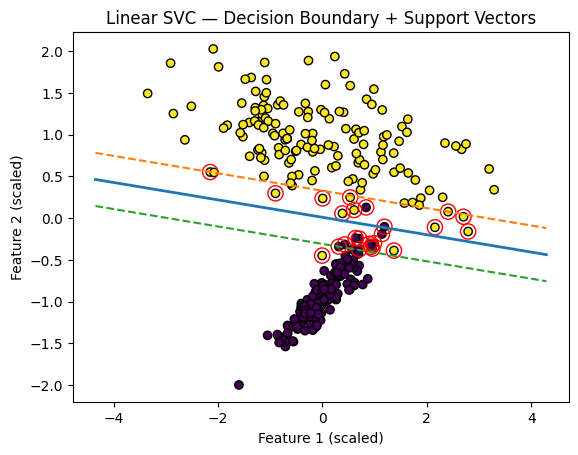

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1. Create 2-class 2D data
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# 2. Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Linear SVC (SVM with linear kernel)
model = SVC(kernel="linear", C=1.0)
model.fit(X_scaled, y)

# 4. Plot decision boundary
w = model.coef_[0]
b = model.intercept_[0]

# Create line for boundary: w1*x + w2*y + b = 0
x_vals = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500)
y_vals = -(w[0]*x_vals + b) / w[1]

# Supporting vectors margins
y_vals_margin_up = -(w[0]*x_vals + b - 1) / w[1]
y_vals_margin_down = -(w[0]*x_vals + b + 1) / w[1]

# 5. Plot everything
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
plt.plot(x_vals, y_vals, linewidth=2)                    # Decision boundary
plt.plot(x_vals, y_vals_margin_up, linestyle='--')      # Margin +
plt.plot(x_vals, y_vals_margin_down, linestyle='--')    # Margin -

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='red')

plt.title("Linear SVC — Decision Boundary + Support Vectors")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
